In [5]:
import pandas as pd

In [2]:
import os

In [3]:
os.chdir("C://Users//sandY//Downloads//a to z data science//Part 4 - Clustering//Section 24 - K-Means Clustering//K_Means//Code Snippets//44. Using Kmeans to Segment Data")

In [6]:
data=pd.read_csv("kc_housingdata.csv")

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# numerical variables

In [14]:
num=data[["price","bedrooms","bathrooms","sqft_living"]]

In [19]:
num.dtypes
import numpy as np

In [20]:
def scale(x):
    return((x-np.mean(x))/np.std(x))
scaled_data=num.apply(scale,axis=0)
           

In [22]:
# scaling using sklearn

In [23]:
from sklearn.preprocessing import scale

In [24]:
sc=scale(num,axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [29]:
pd.DataFrame(sc,columns=num.columns).head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [30]:
scaled_data.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [42]:
print("output is {}".format(type(sc)))

output is <class 'numpy.ndarray'>


In [43]:
from sklearn.cluster import KMeans

In [44]:
k=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)

In [45]:
k.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
k.labels_

array([2, 0, 2, ..., 2, 0, 2])

In [50]:
k.cluster_centers_

array([[-0.03446382,  0.35655822,  0.37037513,  0.22669589],
       [ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.46412963, -0.7252742 , -0.86350929, -0.79078008]])

In [51]:
k.inertia_

39577.70477753478

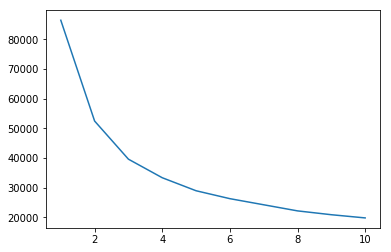

In [56]:
from matplotlib import pyplot as plt
wss=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10)
    k.fit(scaled_data)
    wss.append(k.inertia_)
plt.plot(range(1,11),wss)

In [57]:
from sklearn.metrics import silhouette_score


In [89]:
k=KMeans(n_clusters=8)


In [94]:
label=k.fit(scaled_data).labels_

In [67]:
silhouette_score(scaled_data,label,metric='euclidean',)

0.2824104684040045

In [74]:
for i in range(3,20):
    label=KMeans(n_clusters=i).fit(scaled_data).labels_
    print("shilaute score for "+str(i)+ "is" +str(silhouette_score(scaled_data,label)))

shilaute score for 3is0.32510340934523374
shilaute score for 4is0.27763973787452423
shilaute score for 5is0.29010568577168944
shilaute score for 6is0.2816573822540827
shilaute score for 7is0.2768630488678417
shilaute score for 8is0.2818372725296798
shilaute score for 9is0.27694581146272584
shilaute score for 10is0.2727887428425111
shilaute score for 11is0.2741709418496621
shilaute score for 12is0.28203770219879126
shilaute score for 13is0.2812272705993564
shilaute score for 14is0.2820505520452532
shilaute score for 15is0.2794951024002678
shilaute score for 16is0.28642193646467135
shilaute score for 17is0.27857300735309737
shilaute score for 18is0.2897857073229777
shilaute score for 19is0.29812529987549385


In [79]:
import cluster_profiles as cluster_profiles

In [95]:
cluster_profiles.get_zprofiles(data=num.copy(),kmeans=k)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,-0.203675,-0.493609,0.193883,-0.238476,5700
1,0.644691,0.344504,0.735787,0.992995,3132
2,6.410548,1.250798,2.649467,3.697950,161
3,-0.541765,-0.280692,-1.054306,-0.788549,4008
4,2.285528,0.922012,1.727444,2.194598,994
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.263091,0.804875,0.129242,0.040439,4103
7,-0.494520,-1.571551,-1.211377,-1.073651,2445


In [96]:
cluster_profiles.get_profiles(data=num.copy(),kmeans=k)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.861551,0.863806,1.070609,0.894694,5700
1,1.438231,1.095053,1.267963,1.438486,3132
2,5.357597,1.345113,1.964897,2.632939,161
3,0.631733,0.922553,0.616037,0.651793,4008
4,2.553597,1.254396,1.629109,1.969089,994
5,1.189203,1.588388,1.375735,1.450704,1070
6,0.821162,1.222076,1.047068,1.017857,4103
7,0.663848,0.566387,0.558835,0.525898,2445


# image classification

# aggomolative clustering

In [6]:
import os 

In [7]:
os.chdir("C://Users//sandY//Downloads//a to z data science//Part 4 - Clustering//Section 24 - K-Means Clustering//K_Means//Code Snippets//47. Agglomerative Clustering - Code Demo")pollution_india_2010.csv

In [9]:
import pandas as pd
data=pd.read_csv("pollution_india_2010.csv")

In [10]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


In [11]:
data.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [12]:
data.shape

(181, 5)

In [14]:
data.dtypes

City     object
NO2      object
PM10     object
SO2      object
State    object
dtype: object

In [29]:
data.NO2.astype(int64)

NameError: name 'int64' is not defined